<a href="https://colab.research.google.com/github/Jumping-Saadman/Jumping-Saadman/blob/main/World_Cup_Stickman_Penalty_Shootout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation block

In [ ]:
!pip install -q lucid>=0.2.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tifffile 2022.10.10 requires numpy>=1.19.2, but you have numpy 1.19.0 which is incompatible.
tensorflow 2.9.2 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jaxlib 0.3.25+cuda11.cudnn805 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
jax 0.3.25 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.19.0 which is incompatible.
cmdstanpy 1.0.8 requires numpy>=1.21, but you have numpy 1.19.0 which is incompatible.


In [ ]:
import math
# from pyglet import image

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


# Circle code

In [ ]:
def MidpointCircle(radius, g, h, p): # (g, h) = origin; p = point size
    # gl.glColor3f(1,0,1) 
    gl.glPointSize(p)
    gl.glBegin(gl.GL_POINTS)

    d = 1 - radius
    x = 0
    y = radius

    Circlepoints(x, y, g, h)
    while x < y:
        if d < 0:
            # Choose E
            d = d + 2*x + 3
            x += 1
        else:
            # Choose SE
            d = d + 2*x - 2*y + 5
            x += 1
            y -= 1
        Circlepoints(x, y, g, h)

    gl.glEnd()

In [ ]:
def Circlepoints(x, y, g, h):
    gl.glVertex((x+g)/400, (y+h)/300)
    gl.glVertex((y+g)/400, (x+h)/300)
    gl.glVertex((y+g)/400, (-x+h)/300)
    gl.glVertex((x+g)/400, (-y+h)/300)
    gl.glVertex((-x+g)/400, (-y+h)/300)
    gl.glVertex((-y+g)/400, (-x+h)/300)
    gl.glVertex((-y+g)/400, (x+h)/300)
    gl.glVertex((-x+g)/400, (y+h)/300)

# Line code

Algorithm

In [ ]:
def findZone(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    zone = -1

    if(abs(dx) > abs(dy)):
        if(dx>0 and dy>0): zone = 0
        elif(dx>0 and dy<=0): zone = 7
        elif(dx<=0 and dy>0): zone = 3
        elif(dx<=0 and dy<=0): zone = 4
    else:
        if(dx>0 and dy>0): zone = 1
        elif(dx>0 and dy<=0): zone = 6
        elif(dx<=0 and dy>0): zone = 2
        elif(dx<=0 and dy<=0): zone = 5

    return zone

In [ ]:
def convertToZone0(X, Y, zone):
    x = -9999
    y = -9999
    if(zone == 1):
        x = Y
        y = X
    elif(zone == 2):
        x = Y
        y = -X
    elif(zone == 3):
        x = -X
        y = Y
    elif(zone == 4):
        x = -X
        y = -Y
    elif(zone == 5):
        x = -Y
        y = -X
    elif(zone == 6):
        x = -Y
        y = X
    elif(zone == 7):
        x = X
        y = -Y
    
    return x, y

In [ ]:
def originalZone(X, Y, zone):
    x=-9999
    y=-9999
    if(zone == 0):
        x = X
        y = Y
    elif(zone == 1):
        x = Y
        y = X
    elif(zone == 2):
        x = -Y
        y = X
    elif(zone == 3):
        x = -X
        y = Y
    elif(zone == 4):
        x = -X
        y = -Y
    elif(zone == 5):
        x = -Y
        y = -X
    elif(zone == 6):
        x = Y
        y = -X
    elif(zone == 7):
        x = X
        y = -Y

    return x, y

In [ ]:
def mpld(x1, y1, x2, y2, zone, p):
    gl.glPointSize(p)

    gl.glBegin(gl.GL_POINTS)

    dx = x2 - x1
    dy = y2 - y1
    d = 2* dy - dx
    dNE = 2 * (dy - dx)
    dE = 2 * dy
    x = x1
    y = y1

    _x, _y = originalZone(x, y, zone)
    gl.glVertex(_x/400, _y/300)
    while(x<x2):
        if(d<=0):
            # choose E
            d += dE
            x += 1
        else:
            # choose NE
            d += dNE
            x += 1
            y += 1
        
        _x, _y = originalZone(x, y, zone)
        gl.glVertex(_x/400, _y/300) # The selected pixel closest to the line

    gl.glEnd()

In [ ]:
def mpld_short(x1, y1, x2, y2, p):
    zone = findZone(x1, y1, x2, y2)
    x1, y1 = convertToZone0(x1, y1, zone)
    x2, y2 = convertToZone0(x2, y2, zone)
    mpld(x1, y1, x2, y2, zone, p)

# Seven segments 

In [ ]:
def aSeg(offx, offy):
    gl.glColor3f(1,0,0) # Red color

    x1 = -15 + offx
    y1 = 15 + offy
    x2 = 15 + offx
    y2 = 15 + offy
    mpld_short(x1, y1, x2, y2, 1)

In [ ]:
def bSeg(offx, offy):
    gl.glColor3f(0,1,0) # Green color

    x1 = -15 + offx
    y1 = 0 + offy
    x2 = -15 + offx
    y2 = 15 + offy
    mpld_short(x1, y1, x2, y2, 1)

In [ ]:
def cSeg(offx, offy):
    gl.glColor3f(0,0,1) # Blue color

    x1 = 15 + offx
    y1 = 0 + offy
    x2 = 15 + offx
    y2 = 15 + offy
    mpld_short(x1, y1, x2, y2, 1)

In [ ]:
def dSeg(offx, offy):
    gl.glColor3f(1,1,1) # White color

    x1 = -15 + offx
    y1 = 0 + offy
    x2 = 15 + offx
    y2 = 0 + offy
    mpld_short(x1, y1, x2, y2, 1)

In [ ]:
def eSeg(offx, offy):
    gl.glColor3f(1,1,0) # Yellow color

    x1 = -15 + offx
    y1 = -15 + offy
    x2 = -15 + offx
    y2 = 0 + offy
    mpld_short(x1, y1, x2, y2, 1)

In [ ]:
def fSeg(offx, offy):
    gl.glColor3f(1,0,1) # Purple color

    x1 = 15 + offx
    y1 = -15 + offy
    x2 = 15 + offx
    y2 = 0 + offy
    mpld_short(x1, y1, x2, y2, 1)

In [ ]:
def gSeg(offx, offy):
    gl.glColor3f(0,1,1) # Cyan color
    x1 = -15 + offx
    y1 = -15 + offy
    x2 = 15 + offx
    y2 = -15 + offy
    mpld_short(x1, y1, x2, y2, 1)

number drawer code

In [ ]:
def numberDrawer(n, region):
    if region == 1: 
        offx = -150
        offy = 229.17
    elif region == 2:
        offx = -50
        offy = 229.17
    elif region == 3:
        offx = 50
        offy = 229.17
    elif region == 4:
        offx = 150
        offy = 229.17
    elif region == 5:
        offx = -150
        offy = 177.505
    elif region == 6:
        offx = -50
        offy = 177.505
    elif region == 7:
        offx = 50
        offy = 177.505
    elif region == 8:
        offx = 150
        offy = 177.505
    elif region == 9:
        offx = -150
        offy = 125.835
    elif region == 101:
        offx = -70
        offy = 125.835
    elif region == 102:
        offx = -30
        offy = 125.835
    elif region == 111:
        offx = 30
        offy = 125.835
    elif region == 112:
        offx = 70
        offy = 125.835
    elif region == 121:
        offx = 130
        offy = 125.835
    elif region == 122:
        offx = 170
        offy = 125.835

    if n == 0:
        aSeg(offx, offy)
        bSeg(offx, offy)
        cSeg(offx, offy)
        eSeg(offx, offy)
        fSeg(offx, offy)
        gSeg(offx, offy)
    elif n == 1:
        cSeg(offx, offy)
        fSeg(offx, offy)
    elif n == 2:
        aSeg(offx, offy)
        cSeg(offx, offy)
        dSeg(offx, offy)
        eSeg(offx, offy)
        gSeg(offx, offy)
    elif n == 3:
        aSeg(offx, offy)
        cSeg(offx, offy)
        dSeg(offx, offy)
        fSeg(offx, offy)
        gSeg(offx, offy)
    elif n == 4:
        bSeg(offx, offy)
        dSeg(offx, offy)
        cSeg(offx, offy)
        fSeg(offx, offy)
    elif n == 5:
        aSeg(offx, offy)
        bSeg(offx, offy)
        dSeg(offx, offy)
        fSeg(offx, offy)
        gSeg(offx, offy)
    elif n == 6:
        aSeg(offx, offy)
        bSeg(offx, offy)
        dSeg(offx, offy)
        fSeg(offx, offy)
        eSeg(offx, offy)
        gSeg(offx, offy)
    elif n == 7:
        bSeg(offx, offy)
        aSeg(offx, offy)
        cSeg(offx, offy)
        fSeg(offx, offy)
    elif n == 8:
        aSeg(offx, offy)
        bSeg(offx, offy)
        cSeg(offx, offy)
        dSeg(offx, offy)
        eSeg(offx, offy)
        fSeg(offx, offy)
        gSeg(offx, offy)
    elif n == 9:
        aSeg(offx, offy)
        bSeg(offx, offy)
        cSeg(offx, offy)
        dSeg(offx, offy)
        fSeg(offx, offy)
        gSeg(offx, offy)

# Field

In [ ]:
def field():
    # grass
    gl.glColor3f(0.55,0.77,0.29)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-400/400,-300/300)
    gl.glVertex2f(400/400,-300/300)
    gl.glVertex2f(400/400,200/300)
    gl.glVertex2f(-400/400,200/300)
    gl.glEnd()

    # boundary
    gl.glColor3f(0.41,0.41,0.41)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-400/400,200/300)
    gl.glVertex2f(400/400,200/300)
    gl.glVertex2f(400/400,250/300)
    gl.glVertex2f(-400/400,250/300)
    gl.glEnd()

    # sky
    gl.glColor3f(0.53,0.81,0.92)
    gl.glBegin(gl.GL_QUADS)
    gl.glVertex2f(-400/400,250/300)
    gl.glVertex2f(400/400,250/300)
    gl.glVertex2f(400/400,300/300)
    gl.glVertex2f(-400/400,300/300)
    gl.glEnd()

    # outer d-box
    gl.glColor3f(1,1,1)
    mpld_short(-400, -200, 400, -200, 3)

    # inner d-box
# ----------------------------------------------------------------------------------------------

    # out line
    mpld_short(-400, 100, 400, 100, 3)

    # left line
    mpld_short(-300, 100, -300, 10, 3)

    # bottom line
    mpld_short(-300, 10, 300, 10, 3)

    # right line
    mpld_short(300, 10, 300, 100, 3)

# ----------------------------------------------------------------------------------------------

    # goal post
# ----------------------------------------------------------------------------------------------

    # left bar
    mpld_short(-200, 100, -200, 255, 10)

    # top bar
    mpld_short(-200, 255, 200, 255, 10)

    # right bar
    mpld_short(200, 255, 200, 100, 10)

# ----------------------------------------------------------------------------------------------

    # x - axis and y - axis for debugging
    # gl.glColor3f(0,0,0)
    # # x - axis
    # gl.glBegin(gl.GL_LINES)
    # gl.glVertex2f(-1,0)
    # gl.glVertex2f(1,0)
    # gl.glEnd()

    # # y - axis
    # gl.glBegin(gl.GL_LINES)
    # gl.glVertex2f(0,-1)
    # gl.glVertex2f(0,1)
    # gl.glEnd()


# penalty taker

In [ ]:
def penaltyTaker(position):
    # x - axis and y - axis for debugging
    # gl.glColor3f(1,0,0)
    # # x - axis
    # gl.glBegin(gl.GL_LINES)
    # gl.glVertex2f(-1,0)
    # gl.glVertex2f(1,0)
    # gl.glEnd()

    # # y - axis
    # gl.glBegin(gl.GL_LINES)
    # gl.glVertex2f(0,-1)
    # gl.glVertex2f(0,1)
    # gl.glEnd()

    ba_x1 = 0 
    ba_y1 = 0
    ba_x2 = 100
    ba_y2 = 0

    if position == 0:
        offx = -150
        offy = -210
        angle = 0
        ba_x2 = 125
    elif position == 1:
        offx = -50
        offy = -110
        angle = 15
        ba_x2 = 75

    # angle = 180 # angle overwrite for testing

    gl.glColor3f(0,0,0) # white color

    # legs
    leg1 = rotation(70+angle, ba_x2, ba_y2)
    leg1x, leg1y = int(leg1[0]), int(leg1[1])
    # print(leg1x, leg1y)
    mpld_short(leg1x + offx, leg1y + offy, 0 + offx, 0 + offy, 6) # left leg. theta = 70 degree
    mpld_short(0 + offx, 0 + offy, leg1x + offx, leg1y + offy, 6)

    leg2 = rotation(-70 + angle, ba_x2, ba_y2)
    # print(leg2)
    leg2x_base, leg2y_base = int(leg2[0]), int(leg2[1])
    leg2 = translation(leg1x, leg1y, leg2x_base, leg2y_base)
    leg2x, leg2y = int(leg2[0]), int(leg2[1])
    mpld_short(leg1x + offx, leg1y + offy, leg2x + offx, leg2y + offy, 6) # right leg. theta = -70 degree
    mpld_short(leg2x + offx, leg2y + offy, leg1x + offx, leg1y + offy, 6)

    # body + shoulder + head calculation
    body = scl_refl(1.45, 1, ba_x2, ba_y2)
    bodyx_base, bodyy_base = int(body[0]), int(body[1])
    shoulderx, shouldery = bodyx_base*75/100, 0
    headx, heady = bodyx_base, 0
    # print(headx, heady)
    body = rotation(90+angle, bodyx_base, bodyy_base)
    shoulder = rotation(90+angle, shoulderx, shouldery)
    head = rotation(90+angle, headx, heady)
    bodyx, bodyy = int(body[0]), int(body[1])
    shoulderx, shouldery = int(shoulder[0]), int(shoulder[1])
    headx, heady = int(head[0]), int(head[1])
    # print(headx, heady)
    # now translate
    body = translation(leg1x, leg1y, bodyx, bodyy)
    shoulder = translation(leg1x, leg1y, shoulderx, shouldery)
    head = translation(leg1x, leg1y, headx, heady)
    # print(head)
    bodyx, bodyy = int(body[0]), int(body[1])
    shoulderx, shouldery = int(shoulder[0]), int(shoulder[1])
    headx, heady = int(head[0]), int(head[1])
    mpld_short(leg1x + offx, leg1y + offy, bodyx + offx, bodyy + offy, 8) 
    mpld_short(bodyx + offx, bodyy + offy, leg1x + offx, leg1y + offy, 8) 

    # hands
    hand2 = translation(shoulderx, shouldery, leg2x_base, leg2y_base)
    hand2x, hand2y = int(hand2[0]), int(hand2[1])
    mpld_short(hand2x + offx, hand2y + offy, shoulderx + offx, shouldery + offy, 6)
    mpld_short(shoulderx + offx, shouldery + offy, hand2x + offx, hand2y + offy, 6)

    hand1 = rotation(180+70+angle, ba_x2, ba_y2)
    hand1x, hand1y = int(hand1[0]), int(hand1[1])
    hand1 = translation( shoulderx, shouldery, hand1x, hand1y)
    hand1x, hand1y = int(hand1[0]), int(hand1[1])
    mpld_short(shoulderx + offx, shouldery + offy, hand1x + offx, hand1y + offy, 6)
    mpld_short(hand1x + offx, hand1y + offy, shoulderx + offx, shouldery + offy, 6)

    # head
    gl.glColor3f(1,1,0)
    MidpointCircle(ba_x2*15/100, headx + offx, heady + offy, 20)

# Goalkeeper

In [ ]:
def goalie(position):
    # x - axis and y - axis for debugging
    # gl.glColor3f(1,0,0)
    # x - axis
    # gl.glBegin(gl.GL_LINES)
    # gl.glVertex2f(-1,0)
    # gl.glVertex2f(1,0)
    # gl.glEnd()

    # # y - axis
    # gl.glBegin(gl.GL_LINES)
    # gl.glVertex2f(0,-1)
    # gl.glVertex2f(0,1)
    # gl.glEnd()

    ba_x1 = 0 
    ba_y1 = 0
    ba_x2 = 50
    ba_y2 = 0
    angle = 0
    offx = 0
    offy = 0

    if position == 1:
        offx = -20
        offy = 110
        angle = 90
    elif position == 2:
        offx = -60
        offy = 110
        angle = 45
    elif position == 3:
        offx = -40
        offy = 105
        angle = 0
    elif position == 4:
        offx = 5
        offy = 160
        angle = -45
    elif position == 5:
        offx = 30
        offy = 190
        angle = -90

    # angle = 180 # angle overwrite for testing

    gl.glColor3f(0,0,0) # white color

    # legs
    leg1 = rotation(36.87+angle, ba_x2, ba_y2)
    leg1x, leg1y = int(leg1[0]), int(leg1[1])
    # print(leg1x, leg1y)
    mpld_short(leg1x + offx, leg1y + offy, 0 + offx, 0 + offy, 6) # left leg. theta = 36.87 degree
    mpld_short(0 + offx, 0 + offy, leg1x + offx, leg1y + offy, 6)

    leg2 = rotation(-36.87 + angle, ba_x2, ba_y2)
    # print(leg2)
    leg2x_base, leg2y_base = int(leg2[0]), int(leg2[1])
    leg2 = translation(leg1x, leg1y, leg2x_base, leg2y_base)
    leg2x, leg2y = int(leg2[0]), int(leg2[1])
    mpld_short(leg1x + offx, leg1y + offy, leg2x + offx, leg2y + offy, 6) # right leg. theta = -36.87 degree
    mpld_short(leg2x + offx, leg2y + offy, leg1x + offx, leg1y + offy, 6)

    # body + shoulder + head calculation
    body = scl_refl(1.45, 1, ba_x2, ba_y2)
    bodyx_base, bodyy_base = int(body[0]), int(body[1])
    shoulderx, shouldery = bodyx_base*75/100, 0
    headx, heady = bodyx_base, 0
    # print(headx, heady)
    body = rotation(90+angle, bodyx_base, bodyy_base)
    shoulder = rotation(90+angle, shoulderx, shouldery)
    head = rotation(90+angle, headx, heady)
    bodyx, bodyy = int(body[0]), int(body[1])
    shoulderx, shouldery = int(shoulder[0]), int(shoulder[1])
    headx, heady = int(head[0]), int(head[1])
    # print(headx, heady)
    # now translate
    body = translation(leg1x, leg1y, bodyx, bodyy)
    shoulder = translation(leg1x, leg1y, shoulderx, shouldery)
    head = translation(leg1x, leg1y, headx, heady)
    # print(head)
    bodyx, bodyy = int(body[0]), int(body[1])
    shoulderx, shouldery = int(shoulder[0]), int(shoulder[1])
    headx, heady = int(head[0]), int(head[1])
    mpld_short(leg1x + offx, leg1y + offy, bodyx + offx, bodyy + offy, 8) 
    mpld_short(bodyx + offx, bodyy + offy, leg1x + offx, leg1y + offy, 8) 

    # hands
    hand2 = translation(shoulderx, shouldery, leg1x, leg1y)
    hand2x, hand2y = int(hand2[0]), int(hand2[1])
    mpld_short(hand2x + offx, hand2y + offy, shoulderx + offx, shouldery + offy, 6)
    mpld_short(shoulderx + offx, shouldery + offy, hand2x + offx, hand2y + offy, 6)

    hand1 = rotation(143.13+angle, ba_x2, ba_y2)
    hand1x, hand1y = int(hand1[0]), int(hand1[1])
    hand1 = translation( shoulderx, shouldery, hand1x, hand1y)
    hand1x, hand1y = int(hand1[0]), int(hand1[1])
    mpld_short(shoulderx + offx, shouldery + offy, hand1x + offx, hand1y + offy, 6)
    mpld_short(hand1x + offx, hand1y + offy, shoulderx + offx, shouldery + offy, 6)

    # head
    gl.glColor3f(0.45, 0.67, 0.87)
    MidpointCircle(ba_x2*15/100, headx + offx, heady + offy, 20)

# Goal post regions

In [ ]:
def GPR():

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region A. midpoint=(-150,229.17)
    mpld_short(-200,255, -200,203.34, 1)
    mpld_short(-200,203.34, -100, 203.34, 1)
    mpld_short(-100, 203.34, -100, 255, 1)
    mpld_short(-100, 255, -200, 255, 1)
    numberDrawer(1, 1)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region B. midpoint=(-50,229.17)
    mpld_short(-100,255, -100,203.34, 1)
    mpld_short(-100,203.34, 0, 203.34, 1)
    mpld_short(0, 203.34, 0, 255, 1)
    mpld_short(0, 255, -100, 255, 1)
    numberDrawer(2, 2)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region C. midpoint=(50,229.17)
    mpld_short(0,255, 0,203.34, 1)
    mpld_short(0,203.34, 100, 203.34, 1)
    mpld_short(100, 203.34, 100, 255, 1)
    mpld_short(100, 255, 0, 255, 1)
    numberDrawer(3, 3)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region D. midpoint=(150,229.17)
    mpld_short(100,255, 100,203.34, 1)
    mpld_short(100,203.34, 200, 203.34, 1)
    mpld_short(200, 203.34, 200, 255, 1)
    mpld_short(200, 255, 100, 255, 1)
    numberDrawer(4, 4)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region E
    mpld_short(-200,203.34, -200,151.67, 1)
    mpld_short(-200,151.67, -100, 151.67, 1)
    mpld_short(-100, 151.67, -100, 203.34, 1)
    mpld_short(-100, 203.34, -200, 203.34, 1)
    numberDrawer(5, 5)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region F
    mpld_short(-100,203.34, -100,151.67, 1)
    mpld_short(-100,151.67, 0, 151.67, 1)
    mpld_short(0, 151.67, 0, 203.34, 1)
    mpld_short(0, 203.34, -100, 203.34, 1)
    numberDrawer(6, 6)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region G
    mpld_short(0,203.34, 0,151.67, 1)
    mpld_short(0,151.67, 100, 151.67, 1)
    mpld_short(100, 151.67, 100, 203.34, 1)
    mpld_short(100, 203.34, 0, 203.34, 1)
    numberDrawer(7, 7)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region H
    mpld_short(100,203.34, 100,151.67, 1)
    mpld_short(100,151.67, 200, 151.67, 1)
    mpld_short(200, 151.67, 200, 203.34, 1)
    mpld_short(200, 203.34, 100, 203.34, 1)
    numberDrawer(8, 8)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region I
    mpld_short(-200,151.67, -200,100, 1)
    mpld_short(-200,100, -100, 100, 1)
    mpld_short(-100, 100, -100, 151.67, 1)
    mpld_short(-100, 151.67, -200, 151.67, 1)
    numberDrawer(9, 9)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region J
    mpld_short(-100,151.67, -100,100, 1)
    mpld_short(-100,100, 0, 100, 1)
    mpld_short(0, 100, 0, 151.67, 1)
    mpld_short(0, 151.67, -100, 151.67, 1)
    numberDrawer(1, 101)
    numberDrawer(0, 102)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region K
    mpld_short(0,151.67, 0,100, 1)
    mpld_short(0,100, 100, 100, 1)
    mpld_short(100, 100, 100, 151.67, 1)
    mpld_short(100, 151.67, 0, 151.67, 1)
    numberDrawer(1, 111)
    numberDrawer(1, 112)

    gl.glColor3f(0.7, 0.6, .6) # some color...
    # Region L
    mpld_short(100,151.67, 100,100, 1)
    mpld_short(100,100, 200, 100, 1)
    mpld_short(200, 100, 200, 151.67, 1)
    mpld_short(200, 151.67, 100, 151.67, 1)
    numberDrawer(1, 121)
    numberDrawer(2, 122)


# Football

In [ ]:
def football(region):
    if region == 0: # initial position
        gl.glColor3f(1,1,1)
        for i in range(1, 45):
            MidpointCircle(i, 0, -120, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(45, 0, -120, 3)
    elif region == 1:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, -150,229.17, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, -150,229.17, 3)
    elif region == 2:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, -50,229.17, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, -50,229.17, 3)
    elif region == 3:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, 50,229.17, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, 50,229.17, 3)
    elif region == 4:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, 150,229.17, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, 150,229.17, 3)
    elif region == 5:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, -150,177.505, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, -150,177.505, 3)
    elif region == 6:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, -50,177.505, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, -50,177.505, 3)
    elif region == 7:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, 50,177.505, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, 50,177.505, 3)
    elif region == 8:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, 150,177.505, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, 150,177.505, 3)
    elif region == 9:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, -150,125.835, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, -150,125.835, 3)
    elif region == 10:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, -50,125.835, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, -50,125.835, 3)
    elif region == 11:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, 50,125.835, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, 50,125.835, 3)
    elif region == 12:
        gl.glColor3f(1,1,1)
        for i in range(1, 15):
            MidpointCircle(i, 150,125.835, 3)
        gl.glColor3f(0,0,0)
        MidpointCircle(15, 150,125.835, 3)

 # Matrix Function

In [ ]:
# matrices

def rotation(theta, x, y): # matrix for rotation. Takes degree angle for rotation
    a = math.cos(math.radians(theta))
    b = math.sin(math.radians(theta))
    # print(a,b)

    r = np.array([[a, -b, 0],
                  [b, a, 0],
                  [0, 0, 1]])
    
    v = np.array([[x],
                  [y],
                  [1]])
    
    # print(v)

    v_rot = np.matmul(r,v)
    return v_rot
    
def scl_refl(a, b, x, y): # for reflection, set one scaling factor to -1 and the other to 0
    sc = np.array([[a, 0, 0],
                  [0, b, 0],
                  [0, 0, 1]])
    
    v = np.array([[x],
                  [y],
                  [1]])
    
    v_sc = np.matmul(sc, v)
    return v_sc
    
def shear(a, b, x, y):
    sh = np.array([[1, a, 0],
                  [b, 1, 0],
                  [0, 0, 1]])
    
    v = np.array([[x],
                  [y],
                  [1]])
    
    v_sh = np.matmul(sh, v)
    return v_sh

def translation(tx, ty, x, y):
    t = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    
    v = np.array([[x],
                  [y],
                  [1]])
    
    v_trans = np.matmul(t,v)

    return v_trans


In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glColor(1, 0, 0)

mpld_short(0, 0, 400, 0, 3)

v1 = rotation(45, 0, 0)
x1, y1 = int(v1[0]), int(v1[1])
v2 = rotation(45, 400, 0)
x2, y2 = int(v2[0]), int(v2[1])

print(x1, y1, x2, y2)
mpld_short(x1, y1, x2, y2, 3)

v1 = rotation(45, x1, y1)
x1, y1 = int(v1[0]), int(v1[1])
v2 = rotation(45, x2, y2)
x2, y2 = int(v2[0]), int(v2[1])
print(x1, y1, x2, y2)
mpld_short(x1, y1, x2, y2, 3)

0 0 282 282
0 0 0 398


# Main function

In [ ]:
def penalty_shootout(penalty_taker, region, position):
    field()
    GPR()
    goalie(position)
    football(region)
    penaltyTaker(penalty_taker)

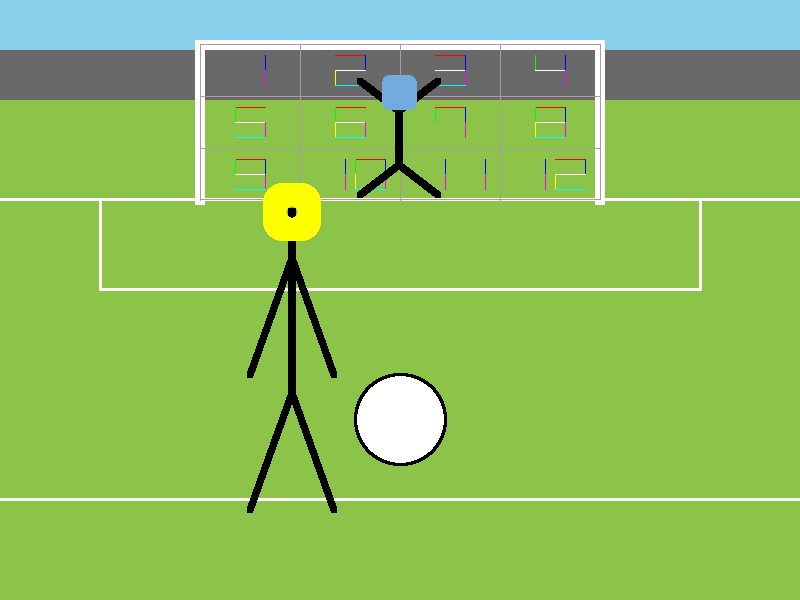

In [ ]:
from IPython.display import display
from PIL import Image

gl.glClear(gl.GL_COLOR_BUFFER_BIT)

penalty_shootout(0, 0, 3)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

while True:
    region = int(input("Please enter target region\n"))
    position = int(input("Please enter goalkeeper defense position\n"))
    if (region >= 1 and region <= 12) and (position >= 1 and position <= 5):
        break
    else:
        print("Please enter region between 1-12 (including) and position between 1-5 (including)")

penalty_shootout(1, region, position)
# penalty_shootout(1, region, 1)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

if (position == 1 and (region == 5 or region == 6 or region == 9 or region == 10)) or (position == 2 and (region == 1 or region == 2 or region == 5 or region == 6 or region == 10)) or (position == 3 and (region == 2 or region == 3 or region == 6 or region == 7 or region == 10 or region == 11)) or (position == 4 and (region == 3 or region == 4 or region == 7 or region == 8 or region == 11)) or (position == 5 and (region == 7 or region == 8 or region == 11 or region == 12)):
    print("Penalty saved!!!")
else:
    print("GOAL!!!")